## Задание 1.
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

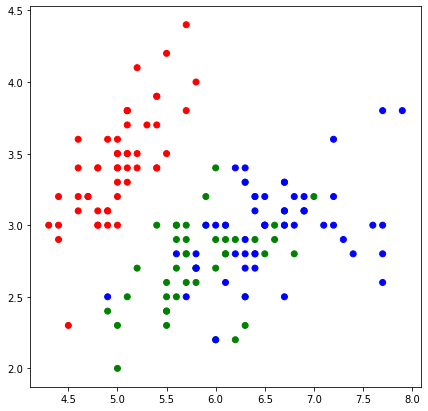

In [3]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [4]:
def e_metrics(x1, x2): 
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [5]:
def knn(x_train, y_train, x_test, k, weighed_method = 0):
#алгоритм поиска k ближайших соседей.
#weighed_method:
#0 - не взвешено
#1 - q**i
#2 - 1/i
#3 - 1/(i+a)**b
#4 - (k+1 - i)/k
#5 - q**d
    answers = []
    for x in x_test:
        test_distances = []          
        for i in range(len(x_train)):
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
# создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
# Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in sorted(test_distances)[0:k]:
            if weighed_method == 0:   
                classes[d[1]] += 1
            if weighed_method == 1:   
                classes[d[1]] += 1/i
            if weighed_method == 2:
                q = 0.5
                classes[d[1]] += q**i
            if weighed_method == 3:
                a = 3
                b = 2
                classes[d[1]] += 1/(i+a)**b
            if weighed_method == 4:
                a = 3
                classes[d[1]] += (k + 1 - i)/k
            if weighed_method == 5:
                q = 0.75
                classes[d[1]] += q**d[0]
            i += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))#вычисление точности

In [7]:
def get_graph(X_train, y_train, k, w):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, w)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 15 и w = 0: 0.833


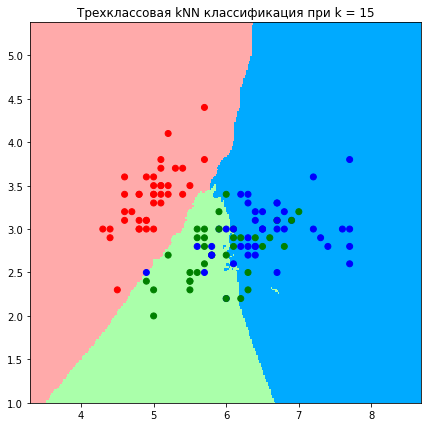

Точность алгоритма при k = 15 и w = 1: 0.767


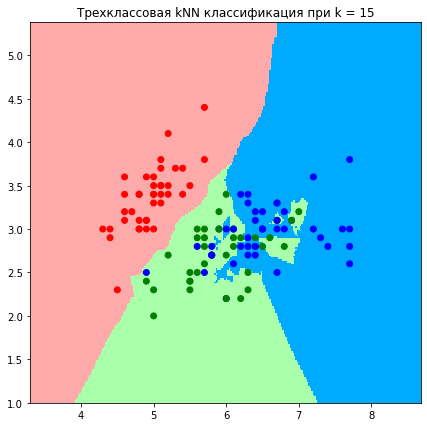

Точность алгоритма при k = 15 и w = 2: 0.667


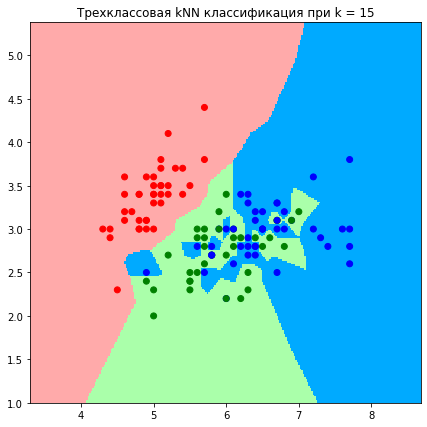

Точность алгоритма при k = 15 и w = 3: 0.767


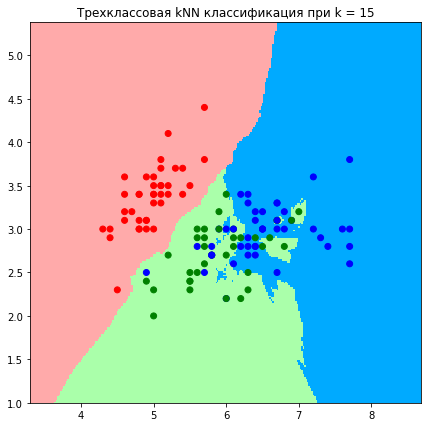

Точность алгоритма при k = 15 и w = 4: 0.867


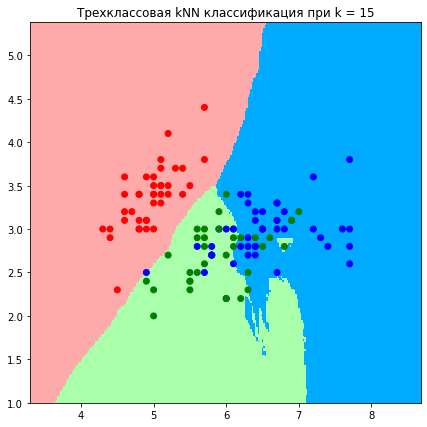

Точность алгоритма при k = 15 и w = 5: 0.833


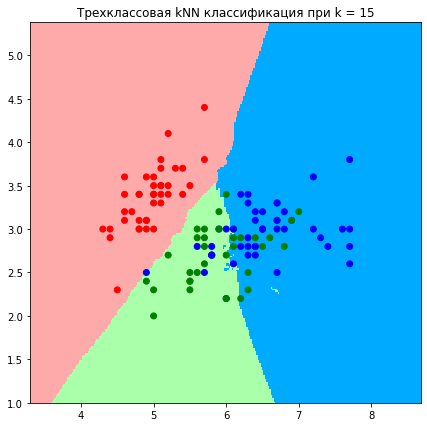

In [8]:
for w in range(6):
    k = 15
    y_pred = knn(X_train, y_train, X_test, k, weighed_method = w)
    print(f'Точность алгоритма при k = {k} и w = {w}: {accuracy(y_pred, y_test):.3f}')
    get_graph(X_train, y_train, k, w)

##  Задание 2.
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Вывод: Метрики качества максимальны при w = 1/(i+a)**b и w = (k+1 - i)/k,   
метрика качества без весов и с w расстоянием до соседа, приблизительно одинаковы.  
При весах зависящих от номера соседа сложность разделяющей гипер плоскости увеличивается,  
в отличие от гиперплоскости без использования весов или с весами в зависимости от расстояния до соседа.

##  Задание 3.
Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

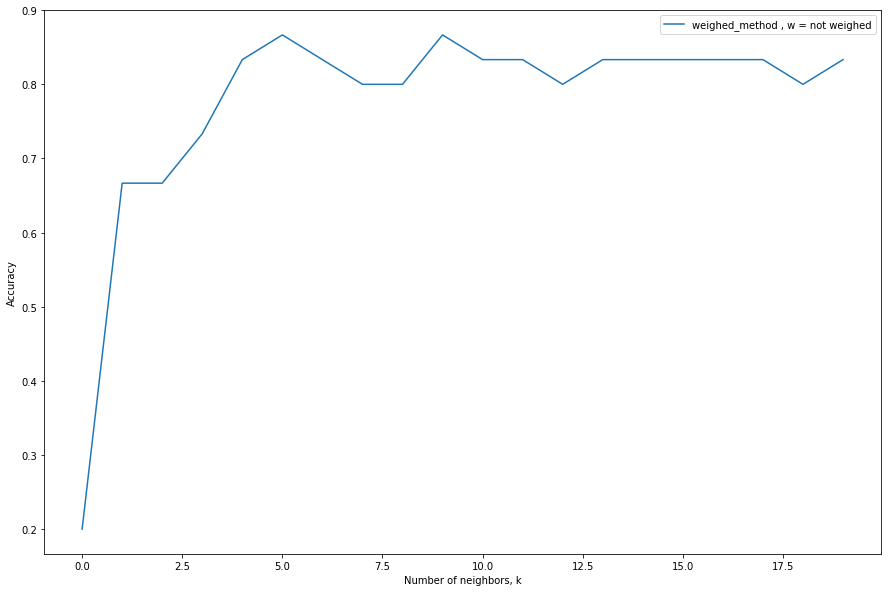

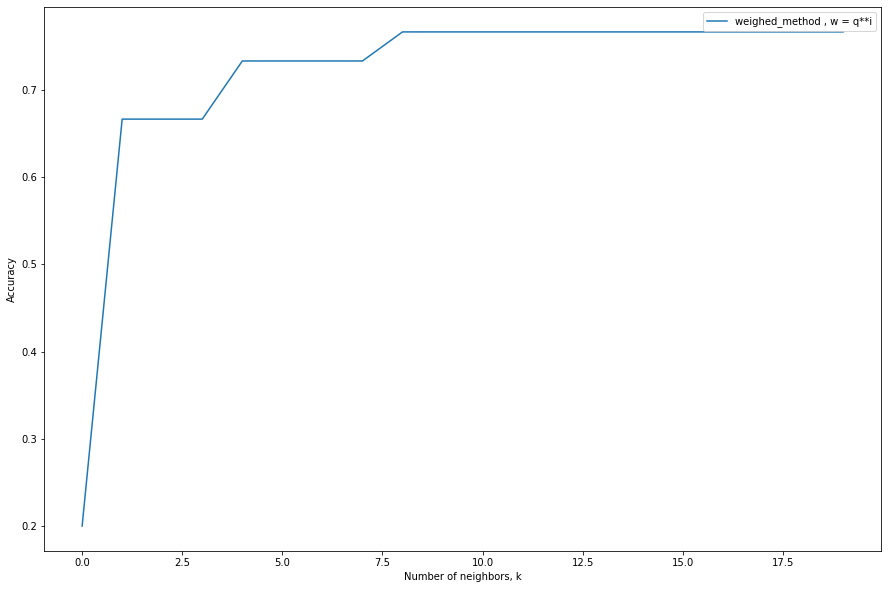

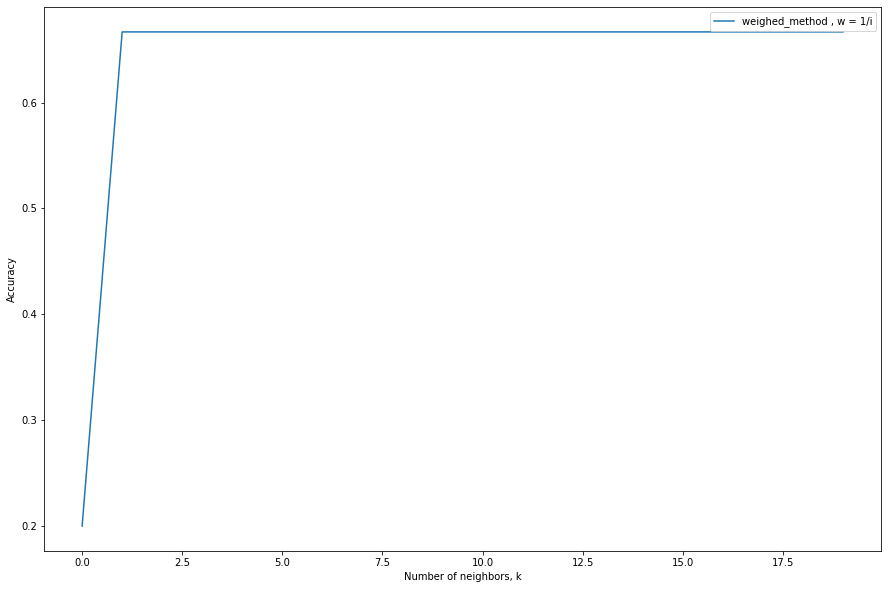

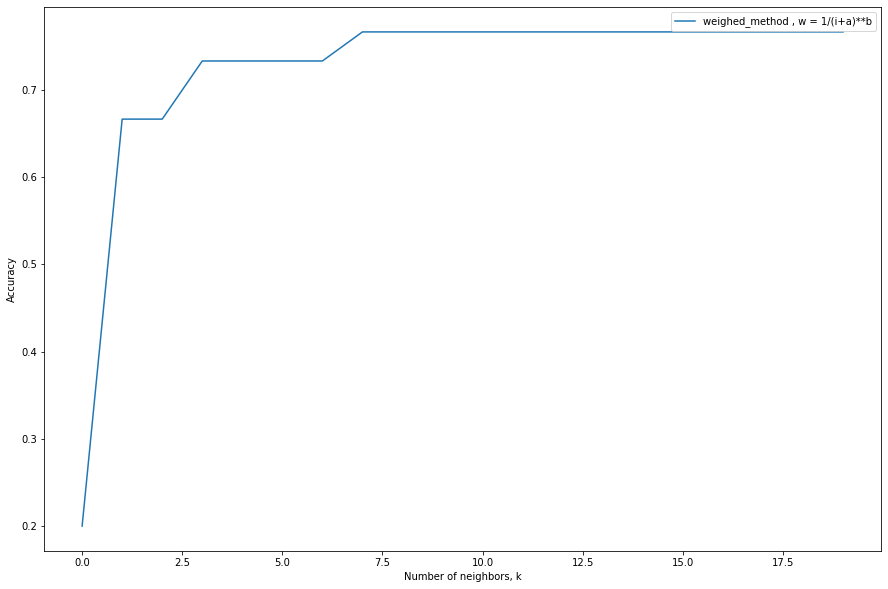

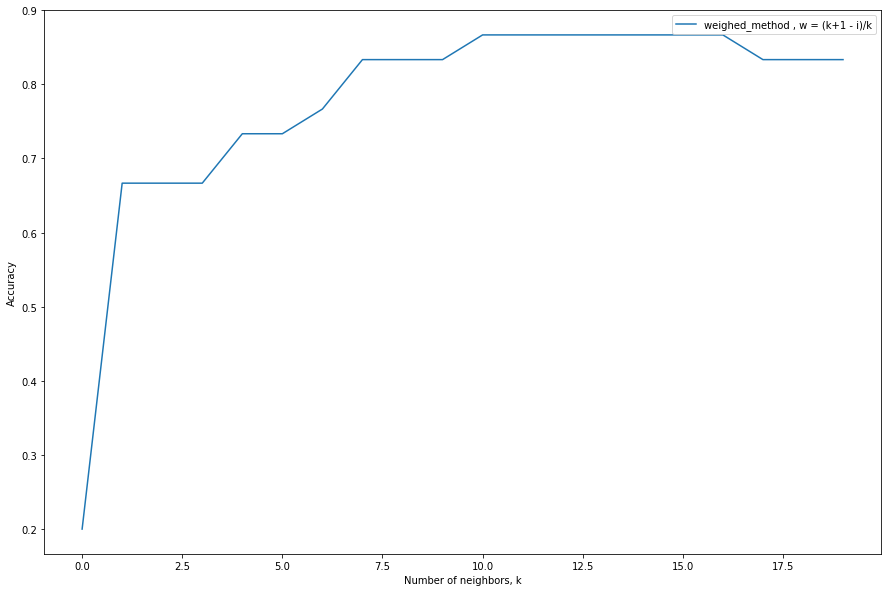

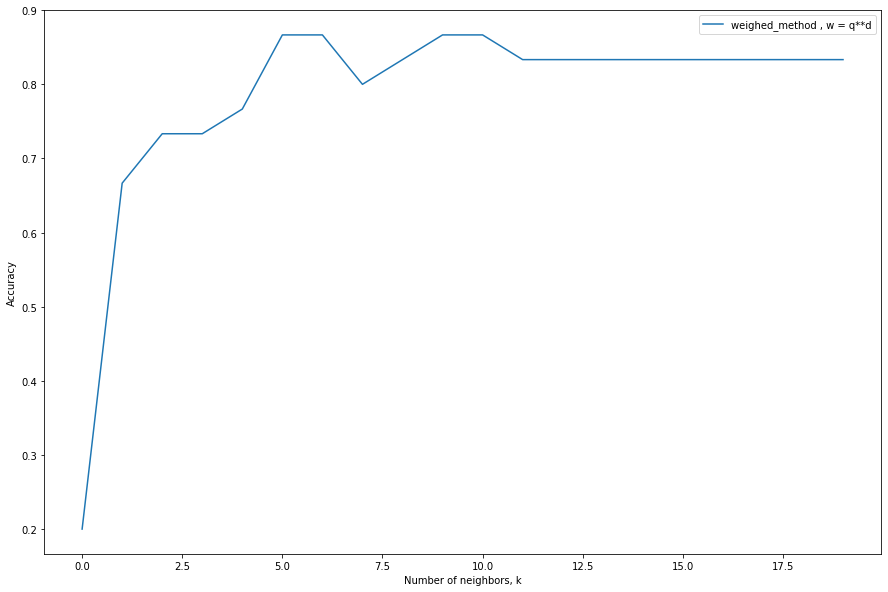

In [9]:
accuracy_w = []
for w in range(6):
    accuracy_k = []
    for k in range(20):
        y_pred = knn(X_train, y_train, X_test, k, weighed_method = w)
        accuracy_k.append((accuracy(y_pred, y_test)))
    accuracy_w.append((accuracy_k))
weighed_method = ['not weighed', 'q**i', '1/i', '1/(i+a)**b', '(k+1 - i)/k', 'q**d'] 
for w in range(len(accuracy_w)):
    plt.figure(figsize=(15, 10))
    plt.xlabel('Number of neighbors, k')
    plt.ylabel('Accuracy')
    k = accuracy_w[w]
    plt.plot(k, label=f'weighed_method , w = {weighed_method[w]}')   
    plt.legend(loc='upper right')
    plt.show()

Оптимальное количество соседей в зависимости для weighed_method:
    
не взвешено: k = 5  
-> q**i: k = 6  
-> 1/i: k = 2  
-> 1/(i+a)**b: k = 6  
-> (k+1 - i)/k: k = 9  
-> q**d: k = 6  

## Задание 4 (опция). 
Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

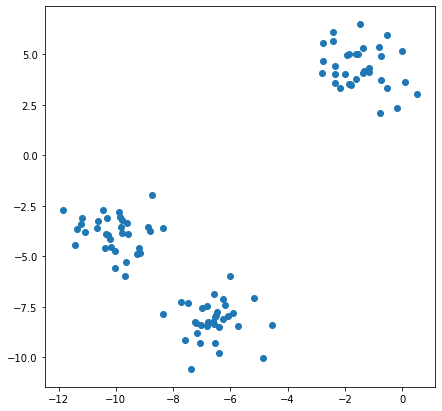

In [10]:
from sklearn.datasets import make_blobs
import random
X, y = make_blobs(n_samples=100, random_state=1)
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [11]:
def kmeans(data, k, max_iterations, min_distance):
    classes = {i: [] for i in range(k)}
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)

        old_centroids = centroids.copy()

        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)

        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False

        if optimal:
            break
    
    return old_centroids, classes

In [12]:
def e_metrics_clasters(count_clasters):
    metrics=[]
    klaster=[]
    for k in range(1,count_clasters+1):
        centroid, cluster = kmeans(X, k, max_iterations, min_distance)  
        distance = 0
        for k in range (len(centroid)):
                for i in cluster[k]:
                    for j in range (len(i)):
                        distance += np.square(i[j] - centroid[k][j])

        metrics.append([np.sqrt(distance)])
        klaster.append(k)
    return metrics ,klaster

In [13]:
max_iterations = 20
min_distance = 1e-4
metrics ,klaster =e_metrics_clasters(count_clasters=10)

Text(0.5, 0, 'Количество кластеров')

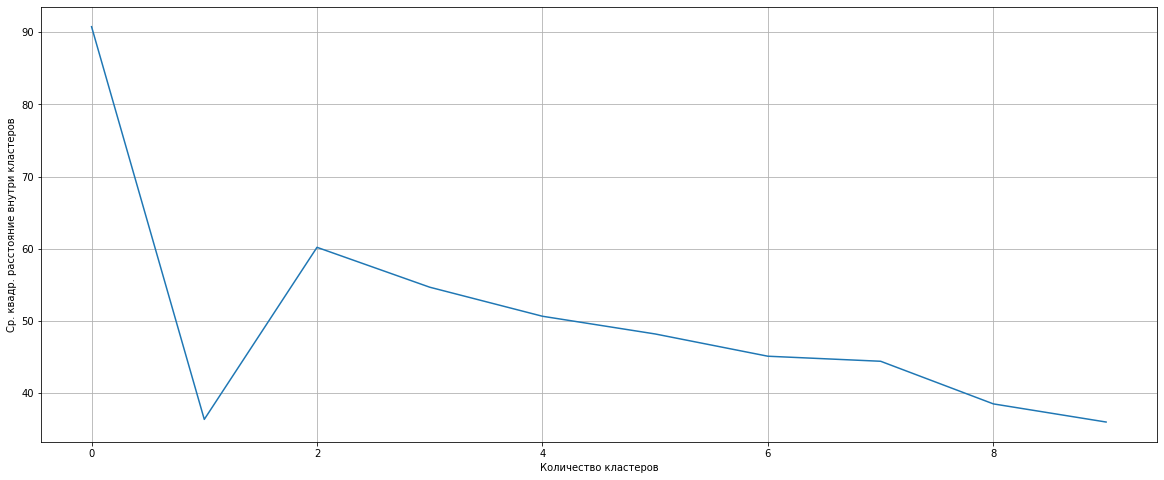

In [14]:
plt.figure(figsize=(20,8))
ax= plt.subplot()
ax.plot(klaster,metrics)
ax.grid()
ax.set_ylabel('Ср. квадр. расстояние внутри кластеров')
ax.set_xlabel('Количество кластеров')